# Exercise 3.2 - Neural Networks

This notebook covers my solutions to Andrew Ng's Machine Learning course Exercise 3 - Neural Networks.

In this exercise, we implement a neural network to fit a non-linear hypothesis to the MNIST dataset. The parameters (weights) of the model have already been provided and the goal of this exercise is to implement the feed-forward algorithm to make a prediction using the provided weights.

First, import necessary packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from scipy.io import loadmat

Let's load and inspect the training data

(-0.5, 399.5, 19.5, -0.5)

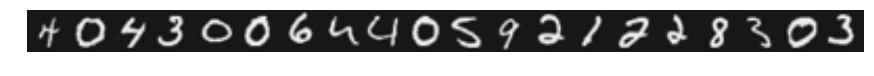

In [2]:
path = os.path.join(os.getcwd(), 'data', 'ex3data1.mat')
data = loadmat(path)
y = data['y']
X = data['X']

# Choose a random sample of data to display
sample = X[np.random.choice(X.shape[0], 20)]
plt.figure(figsize=(15,15))
plt.imshow(sample.reshape(-1, 20).T, interpolation='bilinear', cmap='gray')
plt.axis('off')

The parameters/weights of the neural network have already been provided, let's load these weights and inspect them

In [3]:
path2 = os.path.join(os.getcwd(), 'data', 'ex3weights.mat')
weights = loadmat(path2)
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
print(Theta1.shape, Theta2.shape)

(25, 401) (10, 26)


First, we define our activation function $g(z)$ which is just the sigmoid function from logistic regression

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Now, let's define the predict function which uses the pre-trained weights to predict on the training data using the vectorised implementation of a Neural Network with 2 hidden layers.

In [5]:
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    n = X.shape[1]
    X = np.insert(X, 0, 1, axis=1)
    a2 = sigmoid(X.dot(Theta1.T))
    a2 = np.insert(a2, 0, 1, axis=1)
    a3 = sigmoid(a2.dot(Theta2.T))
    h = np.argmax(a3, axis=1) + 1
    return h

Now, predict on the training data and assess the results

In [6]:
predictions = predict(Theta1, Theta2, X)
correct = [1 if a == b else 0 for (a, b) in zip(predictions, y)]  
accuracy = sum(correct)*100 / len(correct)  
print('accuracy = ', accuracy, '%')

accuracy =  97.52 %


In the next exercise, we implement backpropagation to train the weights of the neural network.